[*********************100%***********************]  3 of 3 completed


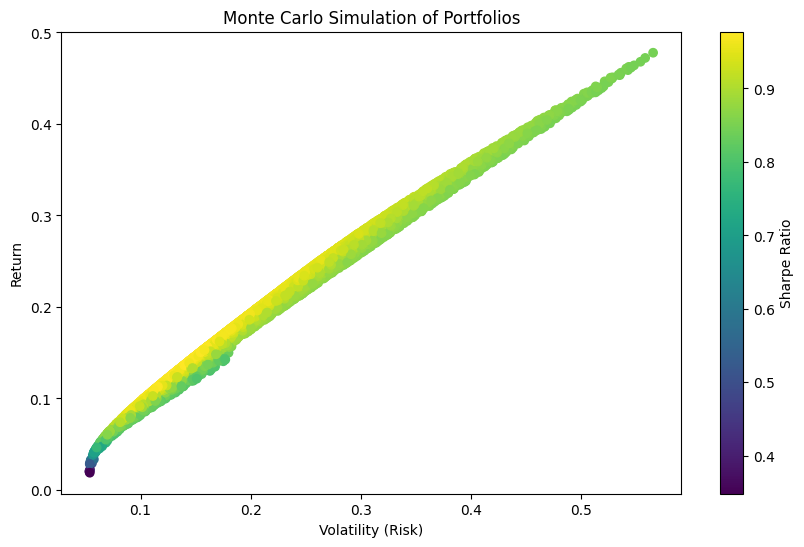

Recommended Portfolio for low risk tolerance:
Return          0.020630
Volatility      0.053624
Sharpe Ratio    0.384714
Name: 8055, dtype: float64


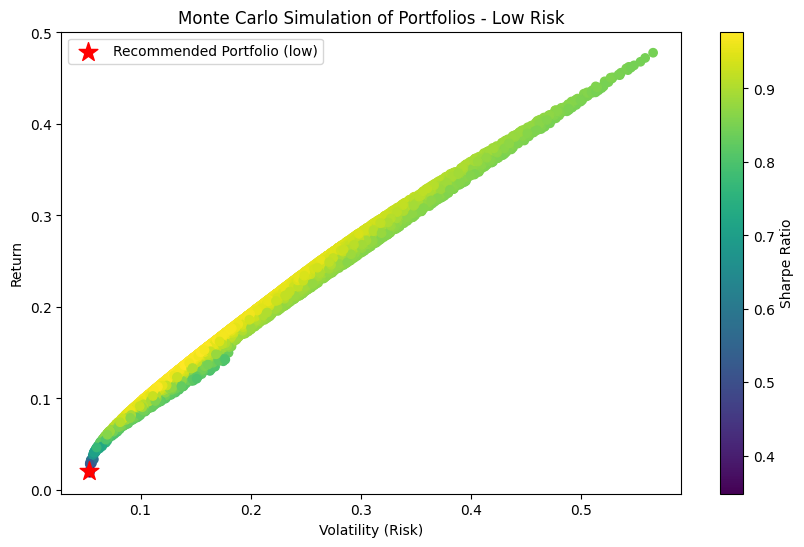

Recommended Portfolio for medium risk tolerance:
Return          0.126446
Volatility      0.129396
Sharpe Ratio    0.977202
Name: 9546, dtype: float64


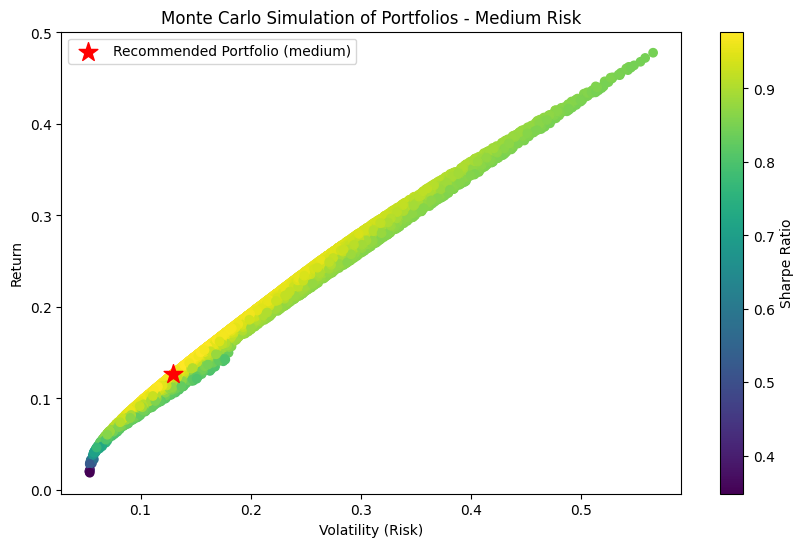

Recommended Portfolio for high risk tolerance:
Return          0.477830
Volatility      0.565467
Sharpe Ratio    0.845018
Name: 2007, dtype: float64


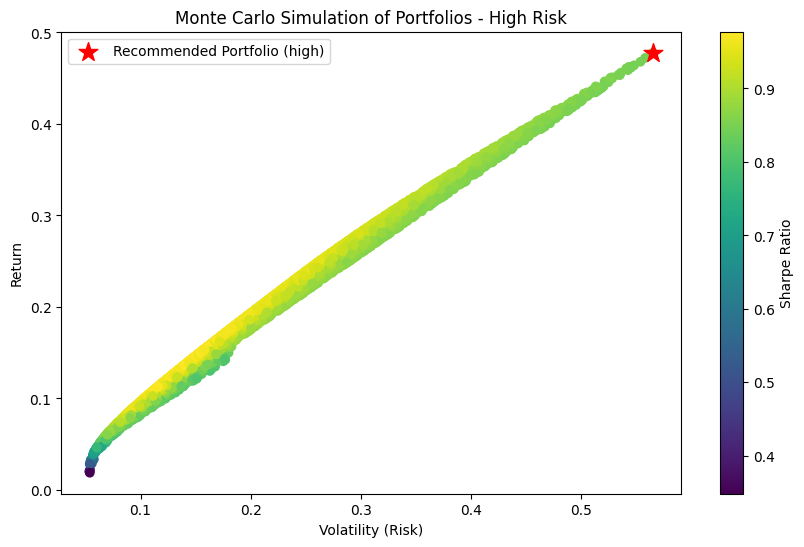

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Fetch historical data for TSLA, BND, and SPY
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate annual returns and volatility
annual_returns = returns.mean() * 252  # 252 trading days in a year
annual_volatility = returns.std() * np.sqrt(252)

# Monte Carlo Simulation for Portfolio Optimization
def monte_carlo_simulation(num_portfolios, annual_returns, annual_volatility):
    results = np.zeros((3, num_portfolios))  # Store returns, volatility, and Sharpe ratios
    for i in range(num_portfolios):
        weights = np.random.random(len(annual_returns))
        weights /= np.sum(weights)  # Normalize to sum to 1
        
        # Portfolio performance
        portfolio_return = np.sum(weights * annual_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        sharpe_ratio = portfolio_return / portfolio_volatility  # Assuming risk-free rate = 0
        
        # Store results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio

    return results

# Simulate portfolios and extract results
num_portfolios = 10000
results = monte_carlo_simulation(num_portfolios, annual_returns, annual_volatility)

# Create a DataFrame with the simulation results
portfolio_results = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# Plot the Monte Carlo simulation results
def plot_monte_carlo_simulation():
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_results.Volatility, portfolio_results.Return, c=portfolio_results['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Monte Carlo Simulation of Portfolios')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Return')
    plt.show()

# Client Risk Tolerance (low, medium, high)
def recommend_portfolio(risk_tolerance='medium'):
    if risk_tolerance == 'low':
        # Client prefers less risk, so we recommend a portfolio with lower volatility
        recommended_portfolio = portfolio_results.loc[portfolio_results.Volatility.idxmin()]
    elif risk_tolerance == 'medium':
        # Client prefers balanced risk-return, so we recommend a portfolio near the efficient frontier
        efficient_frontier = portfolio_results.loc[portfolio_results['Sharpe Ratio'].idxmax()]
        recommended_portfolio = efficient_frontier
    else:
        # Client prefers higher return, accepting more risk
        recommended_portfolio = portfolio_results.loc[portfolio_results.Return.idxmax()]

    return recommended_portfolio

# Visualize the recommended portfolio
def visualize_recommendations(risk_tolerance='medium'):
    recommended_portfolio = recommend_portfolio(risk_tolerance)
    print(f"Recommended Portfolio for {risk_tolerance} risk tolerance:")
    print(recommended_portfolio)
    
    # Highlight the recommended portfolio on the simulation plot
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_results.Volatility, portfolio_results.Return, c=portfolio_results['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(recommended_portfolio['Volatility'], recommended_portfolio['Return'], color='red', marker='*', s=200, label=f"Recommended Portfolio ({risk_tolerance})")
    plt.title(f'Monte Carlo Simulation of Portfolios - {risk_tolerance.capitalize()} Risk')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Perform Monte Carlo Simulation and Visualization
plot_monte_carlo_simulation()

# Example of recommending portfolio based on risk tolerance
visualize_recommendations(risk_tolerance='low')  # Low risk
visualize_recommendations(risk_tolerance='medium')  # Medium risk
visualize_recommendations(risk_tolerance='high')  # High risk
